In [1]:
# Importing the pandas and numpy libraries, as well as the banknote dataset

import pandas as pd
import numpy as np

data = pd.read_csv('Banknote_authentication_dataset.csv')

# Print the first 5 lines of the dataset to confirm it has loaded

print(data.head())

        V1      V2
0  3.62160  8.6661
1  4.54590  8.1674
2  3.86600 -2.6383
3  3.45660  9.5228
4  0.32924 -4.4552


In [2]:
# Display the data count and types

print(data.count())

V1    1372
V2    1372
dtype: int64


In [3]:
# Assign each column to a variable

v1 = data['V1']
v2 = data['V2']

print(v1.head(), '\n\n', v2.head())

0    3.62160
1    4.54590
2    3.86600
3    3.45660
4    0.32924
Name: V1, dtype: float64 

 0    8.6661
1    8.1674
2   -2.6383
3    9.5228
4   -4.4552
Name: V2, dtype: float64


In [4]:
# Show min and max values of the two columns in the dataframe

maxv1 = v1.max()
maxv2 = v2.max()

minv1 = v1.min()
minv2 = v2.min()

print('Maximum value of V1:', maxv1,'\nMinimum value of V1:', minv1, '\n\nMaximum value of V2:', 
      maxv2, '\nMinimum value of V2:', minv2)

Maximum value of V1: 6.8248 
Minimum value of V1: -7.0421 

Maximum value of V2: 12.9516 
Minimum value of V2: -13.7731


In [5]:
# Create variables to examine the mean on the two columns V1 and V2 in the dataframe

meanV1 = v1.mean()
meanV2 = v2.mean()

# Print the two results, with text to clarify the result

print('V1 mean is', meanV1, '\nV2 mean is', meanV2)

V1 mean is 0.43373525728862977 
V2 mean is 1.9223531209912539


In [6]:
# Calculate the standard deviation for each column in the dataset, and print the result

sdV1 = v1.std()
sdV2 = v2.std()

print('V1 standard deviation is', sdV1, '\nV2 standard deviation is', sdV2)

V1 standard deviation is 2.8427625862451658 
V2 standard deviation is 5.869046743580378


In [7]:
# Count number of outliers based on 2 times the standard deviation from the 2D mean

def outliers_v1():
    count = 0
    for i in v1:
        if i < (meanV1 - (sdV1*2)):
            count += 1
        elif i > (meanV1 + (sdV1*2)):
            count += 1
        else:
            count += 0
    print('Total V1 outliers:', (count))

outliers_v1()

def outliers_v2():
    count = 0
    for i in v2:
        if i < (meanV2 - (sdV2*2)):
            count += 1
        elif i > (meanV2 + (sdV2*2)):
            count += 1
        else:
            count += 0
    print('Total V2 outliers:', (count))

outliers_v2()

Total V1 outliers: 31
Total V2 outliers: 41


The number of values in this dataset, by column, as well as the datatypes are: 
 V1    1372
V2    1372
dtype: int64 

V1 standard deviation is 2.8427625862451658 
V2 standard deviation is 5.869046743580378 

V1 mean is 0.43373525728862977 
V2 mean is 1.9223531209912539 

Maximum value of V1: 6.8248 
Minimum value of V1: -7.0421 

Maximum value of V2: 12.9516 
Minimum value of V2: -13.7731 

Outliers calculated as more than 2 standard deviations away from the 2D mean:
Total V1 outliers: 31
Total V2 outliers: 41


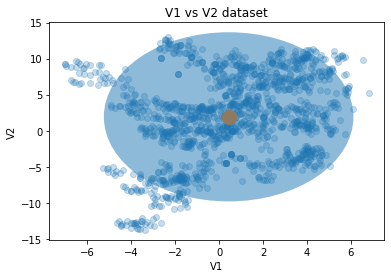

In [8]:
# Import matplotlib library, and show a scatter plot of V1 vs V2 overlain by the 2D mean and an ellipse showing the 2sigma spread

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create an ellipse, centres on the means and with a height and width equal to 4 x the standard deviations
ellipse = patches.Ellipse([meanV1, meanV2], sdV1*4, sdV2*4, alpha = 0.5)

fig,graph = plt.subplots()

plt.title('V1 vs V2 dataset')
plt.xlabel('V1')
plt.ylabel('V2')
graph.scatter(v1, v2, alpha = 0.25)
graph.scatter(meanV1, meanV2, s = 200)
graph.add_patch(ellipse)


plt.show

print('The number of values in this dataset, by column, as well as the datatypes are:','\n', data.count(), '\n')

print('V1 standard deviation is', sdV1, '\nV2 standard deviation is', sdV2, '\n')

print('V1 mean is', meanV1, '\nV2 mean is', meanV2, '\n')

print('Maximum value of V1:', maxv1,'\nMinimum value of V1:', minv1, '\n\nMaximum value of V2:', 
      maxv2, '\nMinimum value of V2:', minv2, '\n')

print('Outliers calculated as more than 2 standard deviations away from the 2D mean:')
outliers_v1()
outliers_v2()

In [9]:
# Import KMeans module from sklearn

from sklearn.cluster import KMeans

[[ 0.88705643  5.94561166]
 [-0.19838275 -3.68774038]]


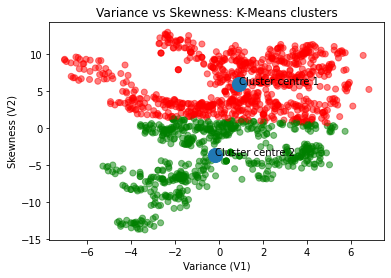

In [37]:
#

km_res = KMeans(n_clusters=2).fit(data)
km_pred = km_res.labels_
clusters = km_res.cluster_centers_

colormap = np.array(['r', 'g', 'b'])

plt.title('Variance vs Skewness: K-Means clusters')
plt.xlabel('Variance (V1)')
plt.ylabel('Skewness (V2)')
plt.scatter(v1, v2, alpha = 0.5,  c=colormap[km_pred])
plt.scatter(clusters[:,0], clusters[:,1], s = 200)
plt.text(clusters[0,0], clusters[0,1], 'Cluster centre 1')
plt.text(clusters[1,0], clusters[1,1], 'Cluster centre 2')

plt.show

print(km_res.cluster_centers_)

In [11]:
# Print the class outputs of the learning dataset i.e. which class of the two clusters has each value been placed in

km_pred = km_res.labels_

print(km_pred)

[0 0 1 ... 1 1 1]


In [12]:
# Combines the class outputs of the KM clustering, and adds one to each value to match the original dataset values of 1 and 2

data_pred = np.column_stack((data, km_pred))
data_pred[:, 2] = data_pred[:, 2] + 1
print(data_pred)

[[  3.6216    8.6661    1.     ]
 [  4.5459    8.1674    1.     ]
 [  3.866    -2.6383    2.     ]
 ...
 [ -3.7503  -13.4586    2.     ]
 [ -3.5637   -8.3827    2.     ]
 [ -2.5419   -0.65804   2.     ]]


In [13]:
# Converts the numpy array into a Pandas dataframe, and names each column

predict_df = pd.DataFrame(data_pred, columns=['V1', 'V2', 'Class'])

print(predict_df)

           V1        V2  Class
0     3.62160   8.66610    1.0
1     4.54590   8.16740    1.0
2     3.86600  -2.63830    2.0
3     3.45660   9.52280    1.0
4     0.32924  -4.45520    2.0
...       ...       ...    ...
1367  0.40614   1.34920    1.0
1368 -1.38870  -4.87730    2.0
1369 -3.75030 -13.45860    2.0
1370 -3.56370  -8.38270    2.0
1371 -2.54190  -0.65804    2.0

[1372 rows x 3 columns]


In [14]:
# Prints the counts of each unique class variable to show the number of genuine and forged notes

predict_df['Class'].value_counts()

1.0    798
2.0    574
Name: Class, dtype: int64

In [15]:
# Import the original bank dataset and print the first 5 lines

orig_data = pd.read_csv('Banknote_original_data.csv')

print(orig_data)

           V1        V2       V3       V4  Class
0     3.62160   8.66610  -2.8073 -0.44699      1
1     4.54590   8.16740  -2.4586 -1.46210      1
2     3.86600  -2.63830   1.9242  0.10645      1
3     3.45660   9.52280  -4.0112 -3.59440      1
4     0.32924  -4.45520   4.5718 -0.98880      1
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949      2
1368 -1.38870  -4.87730   6.4774  0.34179      2
1369 -3.75030 -13.45860  17.5932 -2.77710      2
1370 -3.56370  -8.38270  12.3930 -1.28230      2
1371 -2.54190  -0.65804   2.6842  1.19520      2

[1372 rows x 5 columns]


In [16]:
# Extract only the class column from the original data, and create a new dataframe of only this data

select_column = orig_data[['Class']]

orig_class = select_column.copy()
orig_class.columns = ['Orig_Class']
print(orig_class.head())

   Orig_Class
0           1
1           1
2           1
3           1
4           1


In [17]:
# Combine the new class data with the KM prediction dataset, then convert this array into a Pandas dataframe

comp_data_array = np.column_stack((predict_df, orig_class))
comp_data_df = pd.DataFrame(comp_data_array, columns=['V1', 'V2', 'Class', 'Orig_Class'])
print(comp_data_df)

           V1        V2  Class  Orig_Class
0     3.62160   8.66610    1.0         1.0
1     4.54590   8.16740    1.0         1.0
2     3.86600  -2.63830    2.0         1.0
3     3.45660   9.52280    1.0         1.0
4     0.32924  -4.45520    2.0         1.0
...       ...       ...    ...         ...
1367  0.40614   1.34920    1.0         2.0
1368 -1.38870  -4.87730    2.0         2.0
1369 -3.75030 -13.45860    2.0         2.0
1370 -3.56370  -8.38270    2.0         2.0
1371 -2.54190  -0.65804    2.0         2.0

[1372 rows x 4 columns]


In [18]:
# Compare the two class columns, and output either true or false for a match, then add the result to the dataframe
# as a new column called 'match'

comparison_column = np.where(comp_data_df["Class"] == comp_data_df["Orig_Class"], True, False)

comp_data_df["match"] = comparison_column

print(comp_data_df)

           V1        V2  Class  Orig_Class  match
0     3.62160   8.66610    1.0         1.0   True
1     4.54590   8.16740    1.0         1.0   True
2     3.86600  -2.63830    2.0         1.0  False
3     3.45660   9.52280    1.0         1.0   True
4     0.32924  -4.45520    2.0         1.0  False
...       ...       ...    ...         ...    ...
1367  0.40614   1.34920    1.0         2.0  False
1368 -1.38870  -4.87730    2.0         2.0   True
1369 -3.75030 -13.45860    2.0         2.0   True
1370 -3.56370  -8.38270    2.0         2.0   True
1371 -2.54190  -0.65804    2.0         2.0   True

[1372 rows x 5 columns]


In [20]:
# Show the relative fraction of values from the KM test that match the original dataset

comp_data_df['match'].value_counts('True')

True     0.654519
False    0.345481
Name: match, dtype: float64